<a href="https://colab.research.google.com/github/dineshkumarsarangapani/MicrosoftML-Training/blob/main/bike-share-regression/Bike_Renatals_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
url = 'https://raw.githubusercontent.com/dineshkumarsarangapani/MicrosoftML-Training/main/bike-share-regression/daily-bike-share.csv'

In [255]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

In [256]:
train_data = pd.read_csv(url)

In [257]:
# cat_cols = ['day', 'year', 'weekday', 'mnth','season','weathersit','holiday', 'workingday']
cat_cols = [0,1,2,5,7]
num_cols = ['temp', 'atemp', 'hum', 'windspeed']

In [258]:
train_data.head()

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [259]:
train_data['holiday'].unique()

array([0, 1])

In [260]:
train_data.shape

(731, 13)

In [261]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   day         731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   year        731 non-null    int64  
 3   season      731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  rentals     731 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.4 KB


In [262]:
import seaborn as sns
%matplotlib inline

# sns.heatmap(train_data.T, annot=True)

In [263]:
train_data.columns

Index(['day', 'mnth', 'year', 'season', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'rentals'],
      dtype='object')

array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'season'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'rentals'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

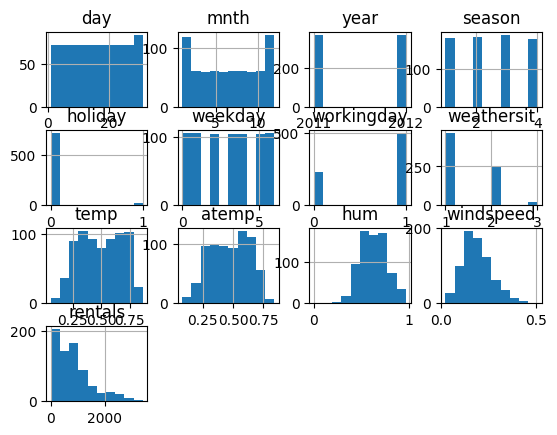

In [264]:
train_data.hist()

In [265]:
train_data.isna().sum()

day           0
mnth          0
year          0
season        0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
dtype: int64

In [266]:
train_data['year'].unique()

array([2011, 2012])

In [267]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

In [268]:
X=train_data[['day', 'mnth', 'year', 'season', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
X.head()

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,2,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,3,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,4,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,5,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900


In [269]:
Y = train_data[['rentals']]

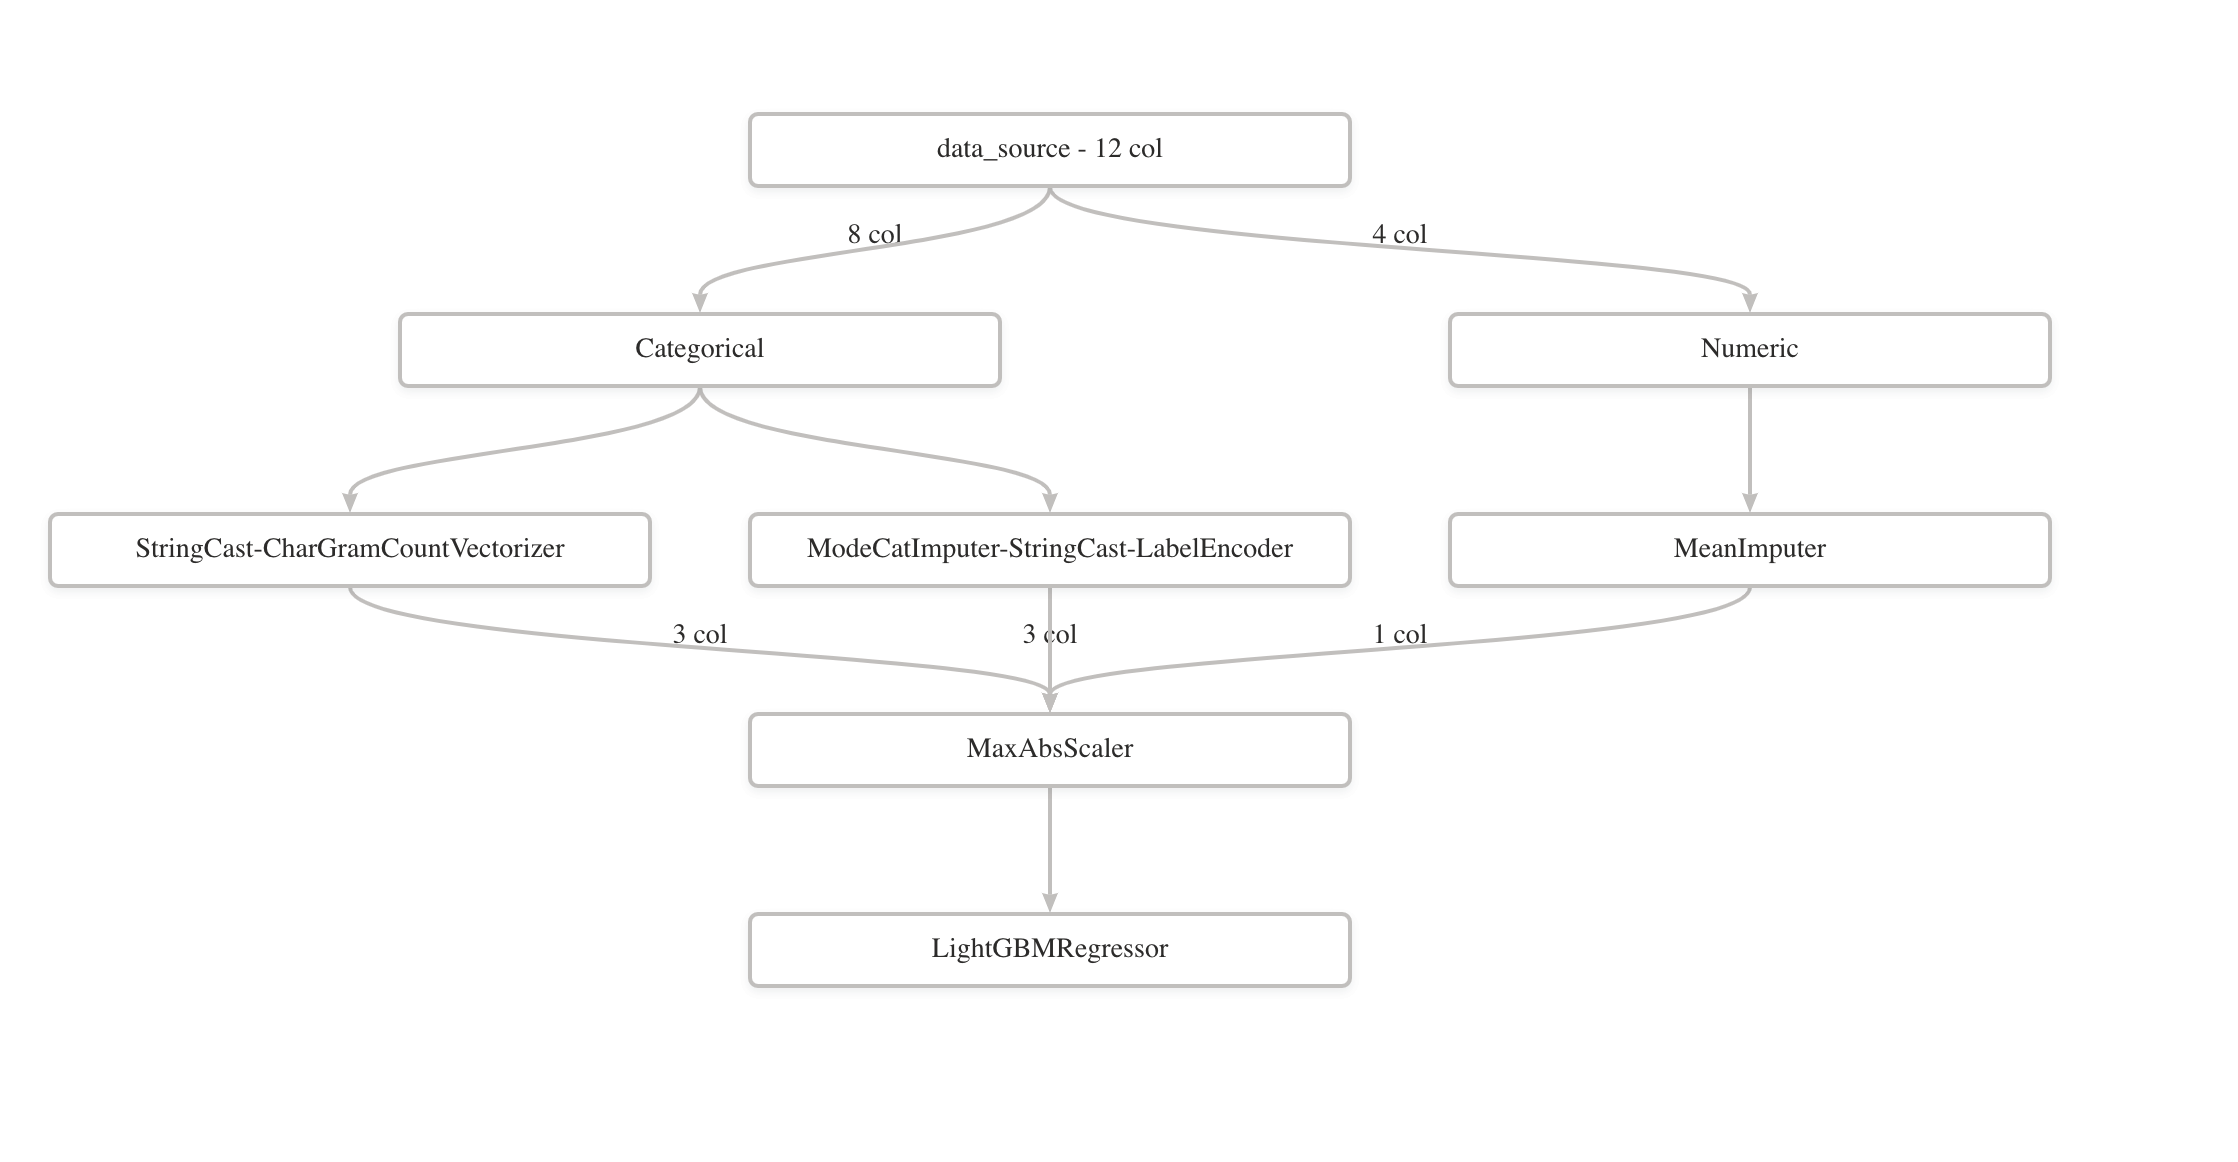

In [270]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
scale = MaxAbsScaler()

cols = make_column_transformer(((OneHotEncoder(), cat_cols)), remainder='passthrough')

pip = Pipeline([
    ("cols", cols), 
    ("scale", scale)
    ])

X_trans = pip.fit_transform(X)
X_trans.shape

(731, 62)

In [271]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X_trans, Y, test_size=0.2, random_state=42)

In [272]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

lin.fit(X_train, y_train)

LinearRegression()

In [273]:
lin.score(X_test, y_test)

0.6755560762003512

In [274]:
from sklearn.linear_model import Ridge

rid = Ridge()

rid.fit(X_train, y_train)

Ridge()

In [275]:
rid.score(X_test, y_test)

0.6832983739606254

In [276]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()

ada.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor()

In [277]:
ada.score(X_test, y_test)

0.720577835481766

In [278]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=200, min_samples_leaf=2,random_state=64)

forest.fit(X_train, y_train)

<ipython-input-278-0f452cb19c23>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestRegressor(min_samples_leaf=2, n_estimators=200, random_state=64)

In [279]:
forest.score(X_test, y_test)

0.8259768893312804

* Sample size: 731
* Mean absolute error: 69.166
* Mean squared error: 11,191.917
* R²: 0.976
* Mean prediction 848.176


In [280]:
y_pred = forest.predict(X_test)

In [281]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,explained_variance_score,mean_squared_log_error

In [282]:
mean_absolute_error(y_test, y_pred)

165.35060960675756

In [283]:
mean_squared_error(y_test, y_pred)

67800.00241945038

In [284]:
r2_score(y_test, y_pred)

0.8259768893312804

In [285]:
explained_variance_score(y_test, y_pred)

0.826052851361633

In [286]:
!pip install lightgbm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [287]:
import lightgbm as lgb


In [288]:
train_data_lgb = lgb.Dataset(X_train, label=y_train)

In [289]:
num_round = 100
param = {'min_data_in_leaf':20}

bst = lgb.train(param, train_data_lgb, num_round)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 584, number of used features: 43
[LightGBM] [Info] Start training from score 867.924658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [290]:
y_pred = bst.predict(X_test)

In [291]:
r2_score(y_test, y_pred)

0.8358019450763359

In [292]:
mean_absolute_error(y_test, y_pred)

164.33112682047835

In [293]:
mean_squared_error(y_test, y_pred)

63972.1269106963

In [294]:
explained_variance_score(y_test, y_pred)

0.835813318322711

In [295]:
from scipy import stats
res = stats.spearmanr(y_test, y_pred)
res

SignificanceResult(statistic=0.9285910601677452, pvalue=2.6864913517476545e-64)

In [296]:
y_test.shape, y_pred.shape

((147, 1), (147,))

In [297]:
y_test_re = y_test.values.ravel()
y_test_re.shape

(147,)

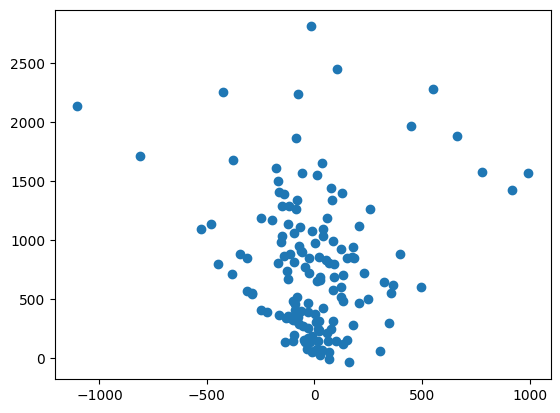

In [298]:
import matplotlib.pyplot as plt

residuals = y_test_re - y_pred
plt.scatter(residuals,y_pred)

plt.show()